# Übung 2 Merkmalsextraktionsverfahren

In dieser Übungseinheit werdet ihr unterschiedliche Merkmalsextraktionsverfahren implementieren.

Für die Bearbeitung dieser Aufgabe benötigt ihr theoretische Kenntnisse für die folgenden Themen: 
- **Harris Corner Detector** 
- **HOG-Features** 
- **SIFT**


**Ziel**: 
Im Zuge der Bearbeitung dieser Aufgabe soll ein tieferes Verständnis der Funktionsweise der oben genannten  Merkmalsextraktionsverfahren erlangt werden.

**Daten**:
Nutzt für die Implementierung der Merkmalsextraktionsverfahren die im Ordner "Bilder" abgelegten Bilddaten (2 - 3 Bilder pro Teilaufgabe).

Beispielbilder der implementierten Verfahren (von links nach rechts): Graustufenbild, Graustufenbild mit Harris-Keypoints, Visualisierung der HOG-Features, Graustufenbild mit SIFT-Keypoints


<img src="./ipynb_bilder/stop_example.png" alt="Alternative text" />

## Imports


**Hinweis Installation von scikit-image-Paket**

Für diejenigen, die auf den eingenen Rechnern arbeiten: scikit-image-Paket 
über das Terminal / anaconda prompt installieren "**conda install scikit-image**"

In [9]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import data, io, exposure, filters, color
from skimage.feature import corner_harris, corner_subpix, corner_peaks, hog, corner_fast, match_descriptors, plot_matched_features
from skimage.feature import haar_like_feature_coord, haar_like_feature, draw_haar_like_feature
from skimage.transform import warp, AffineTransform, rescale, resize
from skimage.draw import ellipse
from scipy.ndimage import gaussian_filter, convolve

## Harris Corner Detector

### Schritt-für-Schritt-Implementierung 

Als erstes sollt ihr mit Hilfe des unten stehenden Kochrezepts jeden einzelnen Schritt der Harris-Funktion implementieren.

**Ziele**:

- Im Zuge der Bearbeitung dieser Aufgabe soll ein tieferes Verständnis der Funktionsweise des Harris Corner Detektors erlangt werden.
- Zudem soll Implementierung von parziellen Ableitungen, Strukturmatrix, Determinante und Matrizenoperationen mit Hilfe von Python-Modulen geübt werden.

Dieses **Kochrezept** könnt ihr für Schritt-für-Schritt-Implementierung der Harris-Funktion nutzen, um die Umsetzung von mathematischen Konzepten wie z.B. parzielle Ableitungen, Strukturmatrix, Determinante und Matrizenoperationen mit Hilfe von Python-Modulen zu üben.

0. Input: ein Grauwertbild S=(s(x, y)) 
1. Berechne die partiellen Ableitungen s_x (x, y) und s_y (x, y) (z.B. mit dem Sobel-Operator) an jedem Bildpunkt s(x, y)
2. Bestimme die Strukturmatrix M für jeden Bildpunkt s(x, y)
3. Glätte die Strukturmatrix 𝑀 mit dem Gauß-Filter
4. Bestimme die Response-Funktion (wird auch als Eckenstärke bezeichnet) mithilfe der Strukturmatrix 𝑀:R=det⁡(M)-k∙Spur(M)^2
5. „Non-maximum suppression“ (optional für die Übungsaufgabe)
6. Output: Koordinaten der Ecken


Mehr Details zum Harris Eckendetektor findet ihr auf S. 346, 16.2.1 Harris Eckendetektor, im [Buch](https://tuudk-berlin.userservices.exlibrisgroup.com/view/action/uresolver.do;jsessionid=C99F04DEAB639A8D4E0F354273A3BB08.app02.eu02.prod.alma.dc03.hosted.exlibrisgroup.com:1801?operation=resolveService&package_service_id=20705780600002884&institutionId=2884&customerId=2880) „Bildverarbeitung : Band II des Standardwerks Computergrafik und Bildverarbeitung“ (Nischwitz, A., 2020).










In [18]:
def harris_corners(img, k=0.04, window_size=3):
    """
    Berechnet die Harris Corner Response Funktion:
    R=Det(M)-k(Trace(M)^2)
        
    Argumente:
        img: ein Graustufenbild
        k: Empfindlichkeit des Eckendetektors, liegt typischerweise im Bereich [0 0.2]

    Rückgabe:
        harris_resp: Harris Response Bild mit dem shape (height, width)
        
    """
    height, width = img.shape
    window = np.ones((window_size, window_size))

    harris_resp = np.zeros((height, width))

    dx = filters.sobel_v(img)
    dy = filters.sobel_h(img)

    ### TO DO:
    
    # Strukturmatrix
    Ixx = dx * dx
    Iyy = dy * dy
    Ixy = dx * dy

    # Gaussfilterung
    GIxx = gaussian_filter(Ixx, sigma=1)
    GIyy = gaussian_filter(Iyy, sigma=1)
    GIxy = gaussian_filter(Ixy, sigma=1)
    
    # Determinante
    det = GIxx * GIyy - GIxy * GIxy

    # Spur 
    trace = GIxx + GIyy

    # Harris Corner Response Funktion
    harris_resp = det - k * (trace ** 2)

    return harris_resp

 Unter folgenden Links fidet ihr die Implementierung der Harris Corner Detector Funktionen in der **scikit-image**-Bibliothek ([Corner Detection](https://scikit-image.org/docs/0.17.x/auto_examples/features_detection/plot_corner.html?highlight=corner%20detection)) und in der **OpenCV**-Bibliothek ([Harris Corner Detection](https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html)). 

Führt Harris Corner Detection mit Hilfe der in diesen Bibliotheken enthaltenen Funktionen durch und vergleicht die Ergebnisse eurer Implementierung mit den Ergebnissen, die ihr mit den bereitgestellten Funktionen bekommt. Stellt ihr Unterschiede fest, versucht diese zu deuten. 



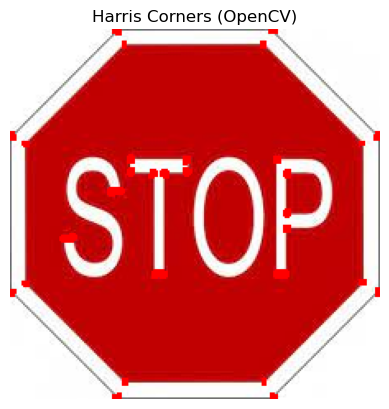

In [11]:
filename = "/Users/chexuanyou/TUB/SS 25/AGBA2/AGBA2/UE_2_Aufgaben-20250515/ipynb_bilder/stop.jpg"
img = cv2.imread(filename)

if img is None:
    raise FileNotFoundError("Error: Bild konnte nicht geladen werden. Bitte überprüfen Sie den Dateipfad.")

# graybild erstellen
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Harris Eckenerkennung
dst = cv2.cornerHarris(gray, 3, 3, 0.04)

# Dilation
dst = cv2.dilate(dst, None)

# Thresholding
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# show the image with Harris corners
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Harris Corners (OpenCV)")
plt.axis('off')
plt.show()


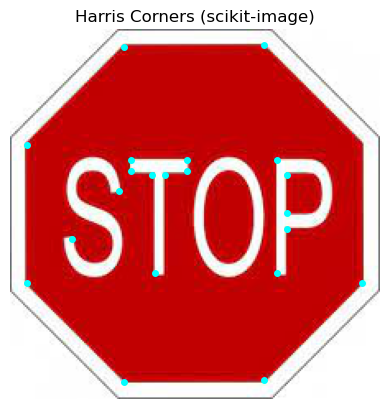

In [ ]:
img_rgb = io.imread(filename)

if img_rgb is None:
    raise FileNotFoundError("Fehler: Bild konnte nicht geladen werden.")

# Wenn Bild farbig ist → Graustufen konvertieren
img_gray = color.rgb2gray(img_rgb)

# Harris-Kornererkennung mit scikit-image
harris_response = corner_harris(img_gray)
# Ecken finden
corners = corner_peaks(harris_response, min_distance=5, threshold_rel=0.01)

# Ergebnis anzeigen
plt.imshow(img_rgb)
plt.plot(corners[:, 1], corners[:, 0], color='cyan', marker='o',
         linestyle='None', markersize=4)
plt.title("Harris Corners (scikit-image)")
plt.axis('off')
plt.show()

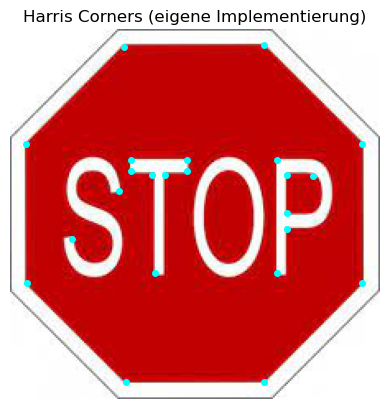

In [22]:
# Harris Response mit eigener Funktion
response = harris_corners(img_gray, k=0.04, window_size=3)

# Ecken extrahieren
corners = corner_peaks(response, min_distance=5, threshold_rel=0.01)

# Ergebnis plotten
plt.imshow(img_rgb)
plt.plot(corners[:, 1], corners[:, 0], color='cyan', marker='o',
         linestyle='None', markersize=4)
plt.title("Harris Corners (eigene Implementierung)")
plt.axis('off')
plt.show()

## HOG (Histogram of Oriented Gradients)

Berechnet für 2-3 Bilder HOG-Features mit der in der scikit-image-Bibliothek implementierten hog-Funktion und visualisiert die berechneten Features.
Verwendet zunächst Defaultparameter der HOG-Funktion. 
Überlegt euch anschließend, welche Parameter angepasst werden können, um das Ergebnis zu optimieren. Berechnet HOG-Features mit angepassten Parametern und vergleicht die Ergebnisse. 

**Kontrollfrage**: Wie wird die Größe des HOG-Feature-Vektors festgelegt bzw. Wovon hängt sie ab?

Theoretische Grundlagen: 
Zusätzlich zu den in der Vorlesung vermittelten theoretischen Grundlagen könnt ihr euch das Kapitel 16.3.3 HOG - Histogram of Oriented Gradients S. 362 im [Buch](https://tuudk-berlin.userservices.exlibrisgroup.com/view/action/uresolver.do;jsessionid=C99F04DEAB639A8D4E0F354273A3BB08.app02.eu02.prod.alma.dc03.hosted.exlibrisgroup.com:1801?operation=resolveService&package_service_id=20705780600002884&institutionId=2884&customerId=2880) „Bildverarbeitung : Band II des Standardwerks Computergrafik und Bildverarbeitung“ (Nischwitz, A., 2020) anschauen.
<img src="./ipynb_bilder/hog.png" alt="Alternative text" />

Die **scikit-image**-Implementierung findet ihr unter den folgenden Links:
- [Histogram of Oriented Gradients](https://scikit-image.org/docs/0.17.x/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)
- [API reference for HOG](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog)
- [Ein Beispiel mit Code für ein tieferes Verständnis](https://www.thepythoncode.com/article/hog-feature-extraction-in-python)

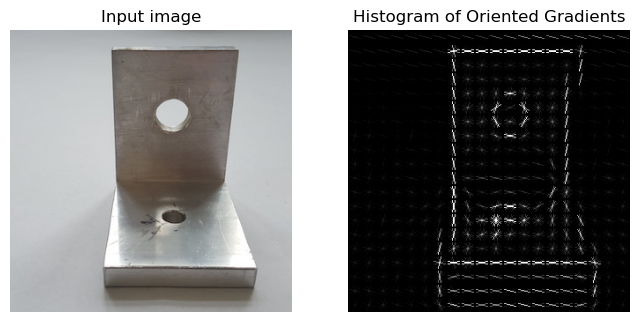

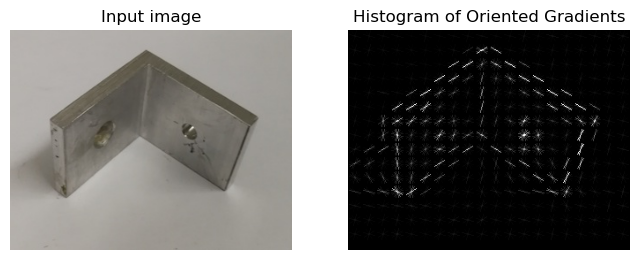

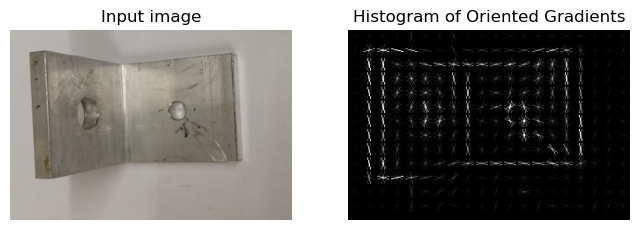

In [ ]:
## hier kommt euer Code
filename1 = "/Users/chexuanyou/TUB/SS 25/AGBA2/AGBA2/UE_2_Aufgaben-20250515/Bilder/biegeteil1.jpg"
filename2 = "/Users/chexuanyou/TUB/SS 25/AGBA2/AGBA2/UE_2_Aufgaben-20250515/Bilder/biegeteil2.jpg"
filename3 = "/Users/chexuanyou/TUB/SS 25/AGBA2/AGBA2/UE_2_Aufgaben-20250515/Bilder/biegeteil3.jpg"
img1 = io.imread(filename1)
img2 = io.imread(filename2)
img3 = io.imread(filename3)

images = [
        img1,
        img2,
        img3
    ]

for i, image in enumerate(images):
    fd, hog_image = hog(image,
                        orientations=8,
                        pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1),
                        visualize=True,
                        channel_axis=-1) # -1 für RGB to tell hog which channel is the color channel

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()


## SIFT (Scale-Invariant Feature Transform)

Berechnet für 2-3 Bilder SIFT-Features mit der in der OpenCV-Bibliothek implementierten sift-Funktion und visualisiert die berechneten Features.
Verwendet zunächst Defaultparameter der sift-Funktion. 
Übeerlegt euch anschließend, welche Parameter und angepasst werden können, um das Ergebnis zu optimieren. Berechnet sift-Features mit angepassten Parametern und vergleicht die Ergebnisse. 

**Kontrollfrage**: Kann die Größe des Descriptors variert werden? Wenn die Antwort ist "ja", wie, wenn die Antwort ist "nein" warum?

Theoretische Grundlagen: 
Zusätzlich zu den in der Vorlesung vermittelten theoretischen Grundlagen könnt ihr euch das Kapitel 16.3.1 SIFT - Scale Invariant Feature Transform S. 351 im [Buch](https://tuudk-berlin.userservices.exlibrisgroup.com/view/action/uresolver.do;jsessionid=C99F04DEAB639A8D4E0F354273A3BB08.app02.eu02.prod.alma.dc03.hosted.exlibrisgroup.com:1801?operation=resolveService&package_service_id=20705780600002884&institutionId=2884&customerId=2880) „Bildverarbeitung : Band II des Standardwerks Computergrafik und Bildverarbeitung“ (Nischwitz, A., 2020) anschauen.
<img src="./ipynb_bilder/sift.png" alt="Alternative text" />

Die **openCV**-Implementierung findet ihr unter dem folgenden Link [Introduction to SIFT](https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html).
[Ein Beispiel mit Code für ein tieferes Verständnis](https://www.thepythoncode.com/article/sift-feature-extraction-using-opencv-in-python)

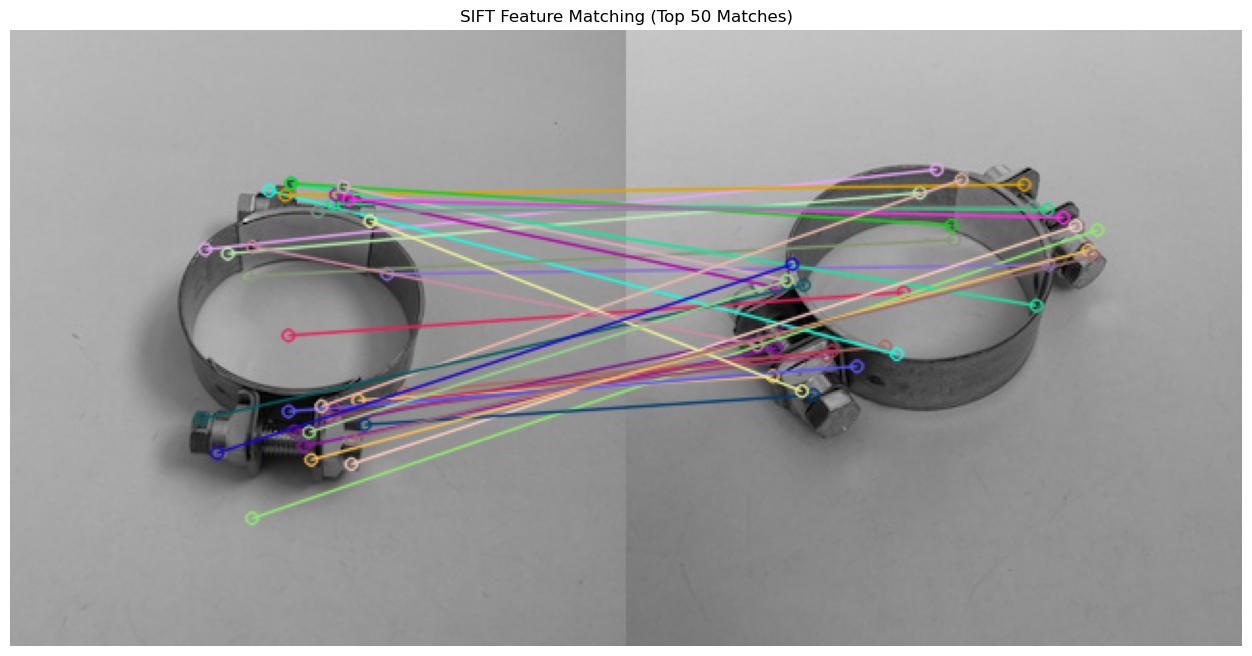

In [29]:
# hier kommt euer Code
sift_filename1 = "/Users/chexuanyou/TUB/SS 25/AGBA2/AGBA2/UE_2_Aufgaben-20250515/Bilder/gleitlagergehause1.jpg"
sift_filename2 = "/Users/chexuanyou/TUB/SS 25/AGBA2/AGBA2/UE_2_Aufgaben-20250515/Bilder/gleitlagergehause2.jpg"

# read the images
sift_img1 = cv2.imread(sift_filename1)
sift_img2 = cv2.imread(sift_filename2)
# convert images to grayscale
sift_img1 = cv2.cvtColor(sift_img1, cv2.COLOR_BGR2GRAY)
sift_img2 = cv2.cvtColor(sift_img2, cv2.COLOR_BGR2GRAY)
# create SIFT object
sift = cv2.SIFT_create()
# detect SIFT features in both images
keypoints_1, descriptors_1 = sift.detectAndCompute(sift_img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(sift_img2,None)

# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# match descriptors of both images
matches = bf.match(descriptors_1,descriptors_2)

# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(sift_img1, keypoints_1, sift_img2, keypoints_2, matches[:50], sift_img2, flags=2)

# OpenCV uses BGR format, convert to RGB for matplotlib
matched_img_rgb = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

# display the matched image
plt.figure(figsize=(16, 8))
plt.imshow(matched_img_rgb)
plt.title("SIFT Feature Matching (Top 50 Matches)")
plt.axis('off')
plt.show()

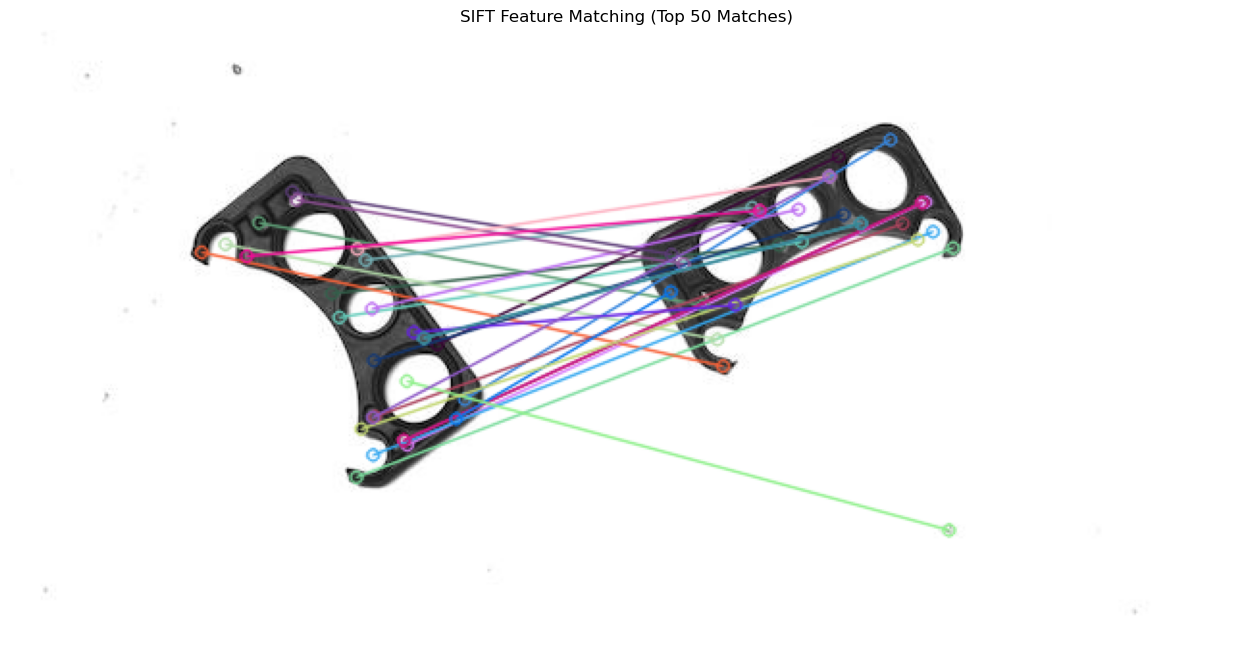

In [30]:
# hier kommt euer Code
sift_filename1 = "/Users/chexuanyou/TUB/SS 25/AGBA2/AGBA2/UE_2_Aufgaben-20250515/Bilder/kunststoffgehause.jpg"
sift_filename2 = "/Users/chexuanyou/TUB/SS 25/AGBA2/AGBA2/UE_2_Aufgaben-20250515/Bilder/kunststoffgehause2.jpg"

# read the images
sift_img1 = cv2.imread(sift_filename1)
sift_img2 = cv2.imread(sift_filename2)
# convert images to grayscale
sift_img1 = cv2.cvtColor(sift_img1, cv2.COLOR_BGR2GRAY)
sift_img2 = cv2.cvtColor(sift_img2, cv2.COLOR_BGR2GRAY)
# create SIFT object
sift = cv2.SIFT_create()
# detect SIFT features in both images
keypoints_1, descriptors_1 = sift.detectAndCompute(sift_img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(sift_img2,None)

# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# match descriptors of both images
matches = bf.match(descriptors_1,descriptors_2)

# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(sift_img1, keypoints_1, sift_img2, keypoints_2, matches[:50], sift_img2, flags=2)

# OpenCV uses BGR format, convert to RGB for matplotlib
matched_img_rgb = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

# display the matched image
plt.figure(figsize=(16, 8))
plt.imshow(matched_img_rgb)
plt.title("SIFT Feature Matching (Top 50 Matches)")
plt.axis('off')
plt.show()

## Bonus - Feature Matching
Das Ziel ist die Features, die aus zwei Bildern extrahiert wurden, zuzuordnen. Dafür gibt es unterschiedliche Methoden. 
Unter folgendem [Link](https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html) findet ihr eine Dokumentation dazu (OpenCV-Bibliothek). 

Anbei ein Beispiel, welches mit dem **Brute-Force Matcher** unter Nutzung der Defayult-Parameter generiert wurde. Das Prinzip des Brute-Force Matchers ist einfach und basiert auf der Berechnung des Abstandes (z.B. L2-Norm) zwischen den Keypoints und Bestimmung des minimalen Abstandes. 
Ihr könnt gerne versuchen den Brute-Forse Matcher für die sift-Deskriptoren der Zangenbilder (Industrial-5.jpg und Industrial-8.jpg) anzuwenden oder ein anderes Bilderpaar aus dem Ordner "Bilder" verwenden. 
<img src="./ipynb_bilder/bfmatcher.png" alt="Alternative text" />